In [1]:
import pandas as pd
import os
import tushare as ts
import datetime
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
import talib as ta
from matplotlib.pylab import date2num
%matplotlib inline

In [2]:
# dir(ts)
# help(ts.get_h_data)

In [3]:
stock='002572'
#stock='300601'
# stock='300122'
# stock='300014'
hist_data =ts.get_hist_data(stock,start='2019-01-01')

In [4]:
ts.get_realtime_quotes(stock)

,name,open,pre_close,price,high,low,bid,ask,volume,amount,...,a2_p,a3_v,a3_p,a4_v,a4_p,a5_v,a5_p,date,time,code
0,索菲亚,22.410,22.700,23.220,23.240,22.050,23.210,23.220,14951147,339856384.040,...,23.230,97,23.240,177,23.250,20,23.260,2019-04-16,14:27:18,002572


In [10]:
macd = ta.MACD(hist_data['close'])
print macd.column
# hist_data

AttributeError: 'tuple' object has no attribute 'columns'

In [ ]:
data_list = []
for dates,row in hist_data.iterrows():
    # 将时间转换为数字
    date_time = datetime.datetime.strptime(dates,'%Y-%m-%d')
    t = date2num(date_time)
    open,high,close,low = row[:4]
    datas = (t,open,high,low,close)
    data_list.append(datas)
 
# 创建子图
fig, ax = plt.subplots(figsize=(20,10))
fig.subplots_adjust(bottom=0.2)
# 设置X轴刻度为日期时间
ax.xaxis_date()
plt.xticks(rotation=45)
plt.yticks()
plt.title(stock)
mpf.candlestick_ohlc(ax,data_list,width=0.9,colorup='red',colordown='green')
plt.grid()

In [12]:
# ?ts.get_hist_data
# ?mpf.candlestick_ohlc

In [36]:
# df=ts.get_today_ticks(stock)
# help(ts.get_today_ticks)

In [37]:
gb = hist_data.groupby('p_change')
gb.mean()

,open,high,close,low,volume,price_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
p_change,,,,,,,,,,,,
-9.50,17.140,17.49,16.39,16.30,378836.25,-1.720,17.618,17.3420,16.8900,192570.92,150541.08,117014.38
-7.93,16.290,16.34,15.09,14.77,503877.75,-1.300,17.224,17.2290,16.8430,278157.23,194286.79,139088.98
-5.76,21.350,21.48,20.61,20.43,229454.36,-1.260,21.404,20.1590,18.9890,295447.22,260736.53,221667.95
-4.68,16.660,16.85,16.08,15.91,101643.83,-0.790,16.630,16.5040,17.2270,67615.66,73817.57,65144.66
-3.27,22.690,22.71,21.87,21.50,245509.08,-0.740,21.022,19.9420,18.7530,288884.76,251718.80,218862.40
-3.23,17.570,17.59,17.07,17.00,89259.53,-0.570,16.896,16.7270,16.7490,110680.16,99404.74,81881.25
-3.10,16.750,16.85,16.23,16.20,45036.81,-0.520,16.968,17.4800,18.0810,61268.26,57332.65,54160.67
-2.83,24.000,24.87,23.32,23.21,236894.02,-0.680,23.256,22.3000,21.6270,251285.56,209947.75,223627.86
-2.52,17.780,17.82,17.40,17.38,149320.80,-0.450,17.110,16.9460,16.9180,193990.59,231728.84,174340.86


(array([ 378836.25,  503877.75,       0.  ,  229454.36,  101643.83,
              0.  ,  616699.44, 1009448.83,  756009.14,  917597.61,
         902845.11,  929230.69, 1156391.37,  904113.85,  593286.69,
         173343.31,  888959.59,  182375.77,       0.  ,  753531.12]),
 array([-9.5   , -8.5255, -7.551 , -6.5765, -5.602 , -4.6275, -3.653 ,
        -2.6785, -1.704 , -0.7295,  0.245 ,  1.2195,  2.194 ,  3.1685,
         4.143 ,  5.1175,  6.092 ,  7.0665,  8.041 ,  9.0155,  9.99  ]),
 <a list of 20 Patch objects>)

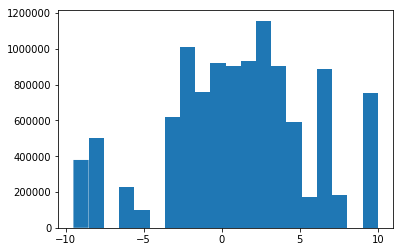

In [40]:
# help(plt.hist)
plt.hist(hist_data['p_change'],bins=20,weights=hist_data['volume'])


In [42]:
df=ts.get_today_ticks(stock)

[Getting data:]###################################################################

In [55]:
df.groupby(df['type']).count()

,time,price,pchange,change,volume,amount
type,,,,,,
0,1,1,1,1,1,1
中性盘,339,339,339,339,339,339
买盘,1984,1984,1984,1984,1984,1984
卖盘,1763,1763,1763,1763,1763,1763
